<a href="https://colab.research.google.com/github/Homaoa/Time-Series-Forecasting-with-XGBoost/blob/main/Time_Series_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
url = "/content/Sickness.csv"
df = pd.read_csv(url)
df.head()

,Month,Sickness_Percent
0,19-Sep,4.33%
1,19-Oct,7.25%
2,19-Nov,2.76%
3,19-Dec,6.14%
4,20-Jan,3.96%


In [43]:
df.tail()

,Month,Sickness_Percent
28,22-Jan,6.89%
29,22-Feb,4.67%
30,22-Mar,5.51%
31,22-Apr,5.32%
32,22-May,3.83%


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             33 non-null     object
 1   Sickness_Percent  33 non-null     object
dtypes: object(2)
memory usage: 656.0+ bytes


In [45]:
# I remove the % sign, also change the type of the variable Sickness_Percent from object to float

df['Sickness_Percent'] = df['Sickness_Percent'].str[:-1]
df['Sickness_Percent'] = df['Sickness_Percent'].astype('float')

In [46]:
# Then, I make a new variable (Date) that consists the month and the year properly, so I can change the variable to datetime

months = []
years = []
for element in df['Month']:
  months.append(element.split('-')[1])
  years.append('20' + element.split('-')[0])
print(months)
print(years)

['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May']
['2019', '2019', '2019', '2019', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2022', '2022', '2022', '2022', '2022']


In [47]:
Date =[]
for i in range(0,33):
  Date.append (months[i] + ' ' + years[i])
print(Date)

['Sep 2019', 'Oct 2019', 'Nov 2019', 'Dec 2019', 'Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020', 'Sep 2020', 'Oct 2020', 'Nov 2020', 'Dec 2020', 'Jan 2021', 'Feb 2021', 'Mar 2021', 'Apr 2021', 'May 2021', 'Jun 2021', 'Jul 2021', 'Aug 2021', 'Sep 2021', 'Oct 2021', 'Nov 2021', 'Dec 2021', 'Jan 2022', 'Feb 2022', 'Mar 2022', 'Apr 2022', 'May 2022']


In [48]:
df['Date'] = Date
df.head()

,Month,Sickness_Percent,Date
0,19-Sep,4.33,Sep 2019
1,19-Oct,7.25,Oct 2019
2,19-Nov,2.76,Nov 2019
3,19-Dec,6.14,Dec 2019
4,20-Jan,3.96,Jan 2020


In [50]:
# I Transform column Date type into datetime

df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Month             33 non-null     object        
 1   Sickness_Percent  33 non-null     float64       
 2   Date              33 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 920.0+ bytes


In [51]:
# Now I can delete column Month

df = df.drop(['Month'] , axis = 1)

In [52]:
# I move the order of the columns

df = df[['Date' , 'Sickness_Percent']]

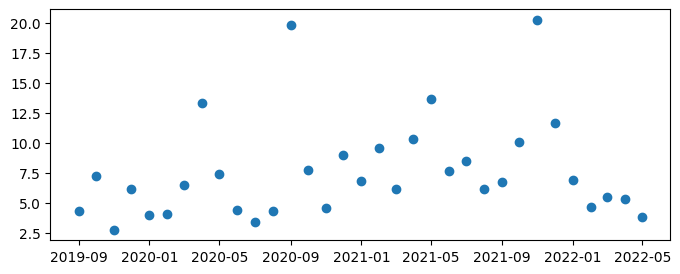

In [53]:
# I draw a figure to see the data

plt.figure(figsize=(8,3))
plt.scatter(df['Date'] , df['Sickness_Percent'])
plt.show()

In [54]:
# In order to train the model and get predictions, first I have to split the data into train and test
# Since the data is time series, I choose an specific date, data before that date are train set and data after
# that are test set
# Here I choose begining of 2022 as the start of test set and I find the rows that their date is before begining of 2022

df.index[df['Date'] < '01-01-2022'].tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27]

In [55]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
print(df)

         Date  Sickness_Percent  Month  Year
0  2019-09-01              4.33      9  2019
1  2019-10-01              7.25     10  2019
2  2019-11-01              2.76     11  2019
3  2019-12-01              6.14     12  2019
4  2020-01-01              3.96      1  2020
5  2020-02-01              4.05      2  2020
6  2020-03-01              6.51      3  2020
7  2020-04-01             13.36      4  2020
8  2020-05-01              7.45      5  2020
9  2020-06-01              4.44      6  2020
10 2020-07-01              3.38      7  2020
11 2020-08-01              4.36      8  2020
12 2020-09-01             19.83      9  2020
13 2020-10-01              7.74     10  2020
14 2020-11-01              4.61     11  2020
15 2020-12-01              8.99     12  2020
16 2021-01-01              6.79      1  2021
17 2021-02-01              9.60      2  2021
18 2021-03-01              6.15      3  2021
19 2021-04-01             10.29      4  2021
20 2021-05-01             13.66      5  2021
21 2021-06

In [56]:
# The train data set is from 0 to 27, and the rest is test data test

train = df[0:28]
test = df[28:33]

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              28 non-null     datetime64[ns]
 1   Sickness_Percent  28 non-null     float64       
 2   Month             28 non-null     int64         
 3   Year              28 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.0 KB


In [58]:
print(test)

         Date  Sickness_Percent  Month  Year
28 2022-01-01              6.89      1  2022
29 2022-02-01              4.67      2  2022
30 2022-03-01              5.51      3  2022
31 2022-04-01              5.32      4  2022
32 2022-05-01              3.83      5  2022


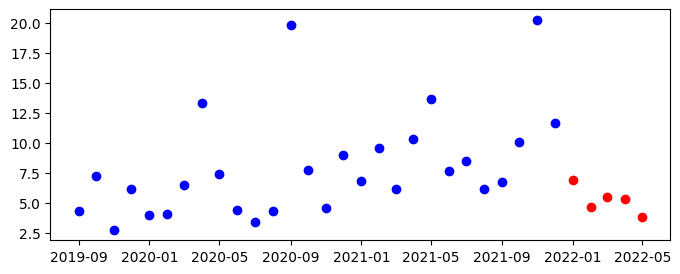

In [59]:
# I draw a figure to see train and test data

plt.figure(figsize=(8,3))
plt.scatter(train['Date'] , train['Sickness_Percent'] , color = 'blue')
plt.scatter(test['Date'] , test['Sickness_Percent'] , color = 'red')
plt.show()

### Model

In [67]:
import xgboost as xgb
from sklearn.metrics import r2_score

In [71]:
X_train = train[['Month' , 'Year']]
y_train = train['Sickness_Percent']

X_test = test[['Month' , 'Year']]
y_test = test['Sickness_Percent']

In [72]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:8.68399	validation_1-rmse:4.79112
[100]	validation_0-rmse:4.78815	validation_1-rmse:1.18775
[145]	validation_0-rmse:3.97128	validation_1-rmse:1.68393


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:46:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [ ]:
y_pred = reg.predict(X_test)
R2 = r2_score(y_test , y_pred)
print(f'Accuracy of the xgboost regression model: {R2}')